In [1]:
'''
Generalization to multiple maps 

We find that the 3 maps occupy a 2D remapping subspace in which the remapping dims
form a 2D equilateral triangle. Remapping dims between each pair are separated by 60 deg.

We expect this geometry to hold in higher dimensions.
'''
import os
import json
import sys
sys.path.append("../data/saved_models/")
sys.path.append("../model_scripts/")
sys.path.append("../utils/")

import numpy as np
import fig4_analysis as rnn
import model_utils

import matplotlib.pyplot as plt
import supp_fig2_plots

In [2]:
# file paths
data_folder = f"../data/saved_models/many_maps/"
save_folder = f"../figures/many_maps_plots/"

if os.path.isdir(save_folder):
    print('save folder exists')
else:
    os.mkdir(save_folder)

save folder exists


In [3]:
''' get the list of model_IDs '''
model_IDs = os.listdir(data_folder)

# select example model
model_ID = '22_112_5'

In [4]:
# get sample rnn data
inputs, outputs, targets = model_utils.sample_rnn_data(data_folder, model_ID)
X, map_targ, pos_targ = model_utils.format_rnn_data(outputs["hidden_states"],\
                                                    targets["map_targets"],\
                                                    targets["pos_targets"])

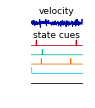

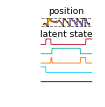

In [5]:
''' Supp Figure 2A: example model schematic, 5 maps '''
f, gs = supp_fig2_plots.plot_a1(inputs["inp_vel"],\
                          inputs["inp_remaps"])
plt.show()
f.savefig(f'{save_folder}inputs.png', dpi=600, bbox_inches='tight')

f, gs = supp_fig2_plots.plot_a2(targets["pos_targets"],\
                          outputs["pos_outputs"],\
                          outputs["map_logits"])
plt.show()
f.savefig(f'{save_folder}outputs.png', dpi=600, bbox_inches='tight')

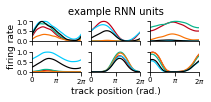

In [7]:
''' Figure 4B: example tuning '''
f, axes = supp_fig2_plots.plot_b(X, map_targ, pos_targ)
plt.show()
f.savefig(f'{save_folder}ex_tuning.png', dpi=600, bbox_inches='tight')

In [4]:
''' number of maps for each model '''
num_maps = np.asarray([])
for m_id in model_IDs:
    # get the number of maps
    num_maps = np.append(num_maps, m_id.split('_')[-1])
num_maps = num_maps.astype(int)

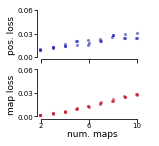

In [5]:
''' Supp Figure 2C: Final loss for different numbers of latent states '''
f, ax = supp_fig2_plots.plot_c(data_folder, model_IDs, num_maps)

plt.show()
f.savefig(f'{save_folder}m_maps_loss.png', dpi=600, bbox_inches='tight')

angle between remapping dims (mean, sem) = 59 deg., 1.1e-07 deg.


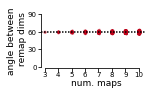

In [8]:
''' Supp Figure 2D: angle between remapping dimensions for 3+ maps '''
f, ax = supp_fig2_plots.plot_d(data_folder, model_IDs, num_maps)

plt.show()
f.savefig(f'{save_folder}m_maps_angles.png', dpi=600, bbox_inches='tight')

mean misalignment = 0.33
sem misalignment = 0.0023


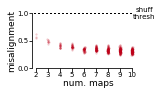

In [7]:
''' Supp Figure 2E: angle between remapping dimensions for 3+ maps '''
f, ax = supp_fig2_plots.plot_e(data_folder, model_IDs, num_maps)

plt.show()
f.savefig(f'{save_folder}m_maps_misalignment.png', dpi=600, bbox_inches='tight')